In [149]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Input, Dense
from keras import Model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import L2
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv("mini_mnist.csv")
X = df.drop('digito', axis=1).values / 255
y = df['digito'].copy().values
n_classes = len(set(y))

In [106]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, 
                                                        shuffle=True, stratify=y, random_state=0)

In [107]:
y_treino = keras.utils.to_categorical(y_treino, n_classes)

In [170]:
entrada = Input((X_treino.shape[1]))
rede = Dense(100, activation='relu', kernel_regularizer=L2(0.001))(entrada)
saida = Dense(n_classes, activation='softmax')(rede)

In [171]:
mlp = Model(inputs=entrada, outputs=saida)

In [172]:
mlp.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_23 (Dense)            (None, 100)               78500     
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [173]:
mlp.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy')

In [174]:
ES = EarlyStopping(patience=20, min_delta=1e-5, restore_best_weights=True)

In [175]:
hist = mlp.fit(X_treino, y_treino, 
               batch_size=100, epochs=100, 
               validation_split=0.1, shuffle=True, callbacks=[ES], verbose=False)

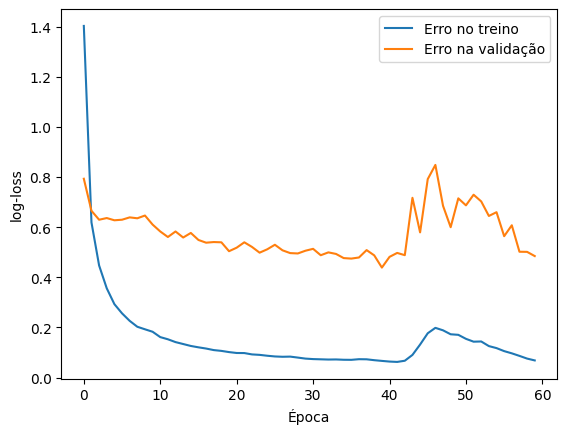

In [183]:
fig, ax = plt.subplots()
ax.plot(range(len(hist.history['loss'])), hist.history['loss'], label='Erro no treino')
ax.plot(range(len(hist.history['val_loss'])), hist.history['val_loss'], label='Erro na validação')
ax.set_xlabel("Época")
ax.set_ylabel("log-loss")
plt.legend()

In [177]:
pred = mlp.predict(X_teste)

10/10 [==============================] - 0s 558us/step


In [178]:
pred = np.argmax(pred, axis=1)

In [179]:
f1_score(y_teste, pred, average='macro')

0.9168852519757207